In [143]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [144]:
df=pd.read_csv('aquastat_united.csv', encoding = 'utf8')
#df= pd.read_csv('aquastatALL.csv', encoding = 'utf8')
type(df)

pandas.core.frame.DataFrame

In [145]:
print(df.head)

<bound method NDFrame.head of     index                      country year_range  year  \
0       1         United Arab Emirates  1958-1962  1962   
1       2         United Arab Emirates  1963-1967  1967   
2       3         United Arab Emirates  1968-1972  1972   
3       4         United Arab Emirates  1973-1977  1977   
4       5         United Arab Emirates  1978-1982  1982   
5       6         United Arab Emirates  1983-1987  1987   
6       7         United Arab Emirates  1988-1992  1992   
7       8         United Arab Emirates  1993-1997  1997   
8       9         United Arab Emirates  1998-2002  2002   
9      10         United Arab Emirates  2003-2007  2007   
10     11         United Arab Emirates  2008-2012  2012   
11     12         United Arab Emirates  2013-2017  2014   
12     13               United Kingdom  1958-1962  1962   
13     14               United Kingdom  1963-1967  1967   
14     15               United Kingdom  1968-1972  1972   
15     16               Un

In [146]:
df.describe()

,index,year,Total area of the country (1000 ha),Arable land area (1000 ha),Permanent crops area (1000 ha),Cultivated area (arable land + permanent crops) (1000 ha),% of total country area cultivated (%),Total population (1000 inhab),Rural population (1000 inhab),Urban population (1000 inhab),...,Unnamed: 427,Unnamed: 429,Unnamed: 430,Unnamed: 431,Unnamed: 433,Unnamed: 434,Unnamed: 435,Unnamed: 437,Unnamed: 438,Unnamed: 439
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,1.0,0.0,6.000000,6.000000,0.0,6.000000,6.000000,0.0,6.000000,6.00000
mean,24.50,1989.250000,273445.666667,47727.545833,903.545833,48631.095833,14.377315,86215.914583,23122.798958,63093.098958,...,3.1,NaN,2004.166667,98.900000,NaN,2004.166667,96.533333,NaN,2004.166667,99.55000
std,14.00,17.056227,405620.240546,74839.529044,957.156735,75603.624558,10.113885,103361.094008,22162.937515,83300.547886,...,NaN,NaN,8.841191,0.260768,NaN,8.841191,1.512173,NaN,8.841191,0.13784
min,1.00,1962.000000,8360.000000,5.000000,3.000000,8.000000,0.095700,112.200000,30.350000,81.850000,...,3.1,NaN,1992.000000,98.500000,NaN,1992.000000,94.400000,NaN,1992.000000,99.40000
25%,12.75,1975.750000,20360.750000,3806.250000,49.000000,4443.500000,5.546000,10302.250000,7867.500000,2504.000000,...,3.1,NaN,1998.250000,98.750000,NaN,1998.250000,95.525000,NaN,1998.250000,99.42500
50%,24.50,1989.500000,59545.500000,7000.000000,570.500000,7285.500000,16.280000,53308.500000,12466.000000,29100.500000,...,3.1,NaN,2004.500000,98.950000,NaN,2004.500000,96.650000,NaN,2004.500000,99.55000
75%,36.25,2003.250000,311774.750000,48851.250000,1771.250000,51076.250000,20.772500,96502.250000,41594.250000,73524.500000,...,3.1,NaN,2010.750000,99.075000,NaN,2010.750000,97.775000,NaN,2010.750000,99.67500
max,48.00,2014.000000,983151.000000,187765.000000,2730.000000,189799.000000,30.440000,321774.000000,60811.000000,265361.000000,...,3.1,NaN,2015.000000,99.200000,NaN,2015.000000,98.200000,NaN,2015.000000,99.70000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 441 entries, index to Unnamed: 440
dtypes: float64(289), int64(39), object(113)
memory usage: 165.5+ KB


In [19]:
#removes columns with no data 
df.dropna(axis=1, how="all")
#removes unlabeled date columns 
exclude_cols = [col for col in list(df) if col.startswith('Unnamed')]
exclude_cols

df1 = df.filter(regex="^(?!({0})$).*$".format('|'.join(exclude_cols)))
#removes year column because redundant with date range
df1 = df1.filter(regex="[^year]")
df1


,index,country,year_range,Total area of the country (1000 ha),Arable land area (1000 ha),Permanent crops area (1000 ha),Cultivated area (arable land + permanent crops) (1000 ha),% of total country area cultivated (%),Total population (1000 inhab),Rural population (1000 inhab),...,Harvested irrigated temporary crop area: Other crops (1000 ha),Harvested irrigated permanent crop area: Bananas (1000 ha),Harvested irrigated permanent crop area: Citrus (1000 ha),Harvested irrigated permanent crop area: Grass and Fodder (1000 ha),Harvested irrigated permanent crop area: Other crops (1000 ha),% of total grain production irrigated (%),Flood occurrence (WRI) (-),Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%)
0,1,United Arab Emirates,1958-1962,8360,5.0,3.0,8.0,0.0957,112.2,30.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,United Arab Emirates,1963-1967,8360,6.0,4.0,10.0,0.1196,171.8,39.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,United Arab Emirates,1968-1972,8360,7.0,5.0,12.0,0.1435,324.1,66.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,United Arab Emirates,1973-1977,8360,12.0,5.0,17.0,0.2033,722.8,143.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,United Arab Emirates,1978-1982,8360,18.0,9.0,27.0,0.3230,1158.0,228.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,United Arab Emirates,1983-1987,8360,29.0,9.0,38.0,0.4545,1519.0,315.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,United Arab Emirates,1988-1992,8360,38.0,31.0,69.0,0.8254,2019.0,434.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.7,100.0,99.6
7,8,United Arab Emirates,1993-1997,8360,45.0,50.0,95.0,1.1360,2595.0,535.00,...,0.2070,NaN,NaN,NaN,32.83,100.0,NaN,99.7,100.0,99.6
8,9,United Arab Emirates,1998-2002,8360,75.0,191.0,266.0,3.1820,3394.0,780.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.7,100.0,99.6
9,10,United Arab Emirates,2003-2007,8360,44.6,188.0,232.6,2.7820,6010.0,1197.00,...,0.0585,0.0131,0.9692,2.801,186.40,NaN,NaN,99.6,100.0,99.6


In [65]:
df1.columns

Index(['index', 'country', 'year_range', 'Total area of the country (1000 ha)',
       'Arable land area (1000 ha)', 'Permanent crops area (1000 ha)',
       'Cultivated area (arable land + permanent crops) (1000 ha)',
       '% of total country area cultivated (%)',
       'Total population (1000 inhab)', 'Rural population (1000 inhab)',
       ...
       'Harvested irrigated temporary crop area: Other crops (1000 ha)',
       'Harvested irrigated permanent crop area: Bananas (1000 ha)',
       'Harvested irrigated permanent crop area: Citrus (1000 ha)',
       'Harvested irrigated permanent crop area: Grass and Fodder (1000 ha)',
       'Harvested irrigated permanent crop area: Other crops (1000 ha)',
       '% of total grain production irrigated (%)',
       'Flood occurrence (WRI) (-)',
       'Total population with access to safe drinking-water (JMP) (%)',
       'Rural population with access to safe drinking-water (JMP) (%)',
       'Urban population with access to safe drinking-

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 116 entries, index to Urban population with access to safe drinking-water (JMP) (%)
dtypes: float64(102), int64(12), object(2)
memory usage: 43.6+ KB


In [69]:
df1.groupby('country').describe()

% of agricultural water managed area equipped for irrigation (%)  \
country                                                                                               
United Arab Emirates        count                                           3.000000                  
                            mean                                          100.000000                  
                            std                                             0.000000                  
                            min                                           100.000000                  
                            25%                                           100.000000                  
                            50%                                           100.000000                  
                            75%                                           100.000000                  
                            max                                           100.000000                  
United Kingdom              count                                           1.000000                  
                            mean                                           60.610000                  
                            std                                                  NaN                  
                            min                                            60.610000                  
                            25%                                            60.610000                  
                            50%                                            60.610000                  
                            75%                                            60.610000                  
                            max                                            60.610000                  
United Republic of Tanzania count                                           2.000000                  
                            mean                                           90.500000                  
                            std                                            47.376154                  
                            min                                            57.000000                  
                            25%                                            73.750000                  
                            50%                                            90.500000                  
                            75%                                           107.250000                  
                            max                                           124.000000                  
United States of America    count                                           9.000000                  
                            mean                                        24401.333333                  
                            std                                          4872.870638                  
                            min                                         14996.000000                  
                            25%                                         26644.000000                  
                            50%                                         26708.000000                  
                            75%                                         26937.000000                  
                            max                                         27070.000000                  

                                   % of area equipped for full control irrigation actually irrigated (%)  \
country                                                                                                    
United Arab Emirates        count                                           3.000000                       
                            mean                                           88.103333                       
                            std                                            10.312858                

In [149]:
#subsetting df by three columns of interest
#showing all HDI, each is a max ( or a min), cuz only one per grouping
df2 = df1[["country", "year_range", "Human Development Index (HDI) [highest = 1] (-)", 'Gender Inequality Index (GII) [equality = 0; inequality = 1) (-)']]
df2.groupby(['country','year_range']).max()


Human Development Index (HDI) [highest = 1] (-)  \
country                     year_range                                                    
United Arab Emirates        1958-1962                                               NaN   
                            1963-1967                                               NaN   
                            1968-1972                                               NaN   
                            1973-1977                                               NaN   
                            1978-1982                                               NaN   
                            1983-1987                                               NaN   
                            1988-1992                                            0.7256   
                            1993-1997                                               NaN   
                            1998-2002                                            0.7971   
                            2003-2007                                               NaN   
                            2008-2012                                            0.8305   
                            2013-2017                                            0.8355   
United Kingdom              1958-1962                                               NaN   
                            1963-1967                                               NaN   
                            1968-1972                                               NaN   
                            1973-1977                                               NaN   
                            1978-1982                                               NaN   
                            1983-1987                                               NaN   
                            1988-1992                                            0.7732   
                            1993-1997                                               NaN   
                            1998-2002                                            0.8654   
                            2003-2007                                               NaN   
                            2008-2012                                            0.9014   
                            2013-2017                                            0.9067   
United Republic of Tanzania 1958-1962                                               NaN   
                            1963-1967                                               NaN   
                            1968-1972                                               NaN   
                            1973-1977                                               NaN   
                            1978-1982                                               NaN   
                            1983-1987                                               NaN   
                            1988-1992                                            0.3694   
                            1993-1997                                               NaN   
                            1998-2002                                            0.3920   
                            2003-2007                                               NaN   
                            2008-2012                                            0.5104   
                            2013-2017                                            0.5212   
United States of America    1958-1962                                               NaN   
                            1963-1967                                               NaN   
                            1968-1972                                               NaN   
                            1973-1977                                               NaN   
                            1978-1982                                               NaN   
                            1983-1987                                               NaN   
                            1988-199

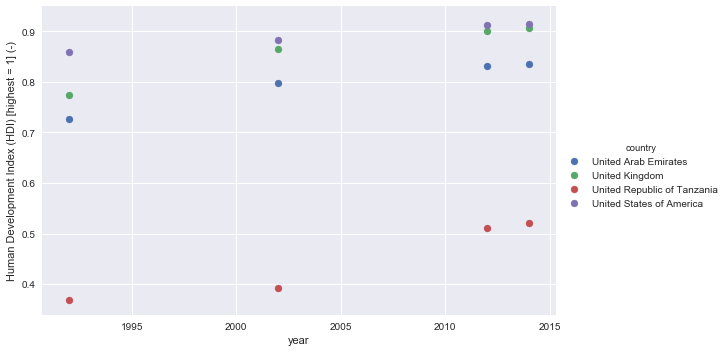

In [162]:
#plot HDI over time by country
import seaborn

fg = seaborn.FacetGrid(data=df, hue= 'country', size= 5, aspect=1.61)
fg.map(pyplot.scatter, 'year', 'Human Development Index (HDI) [highest = 1] (-)').add_legend()


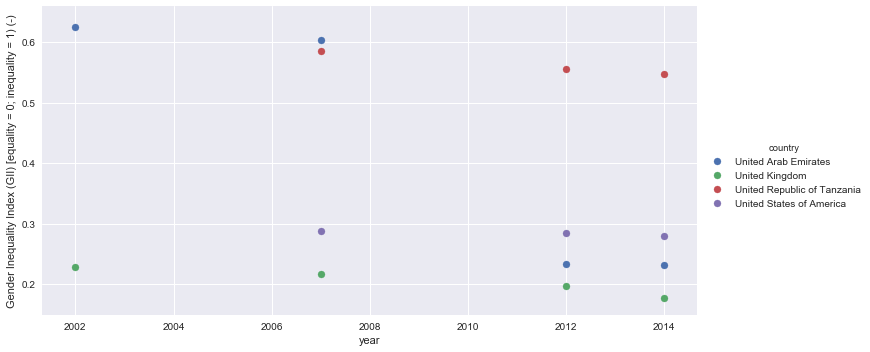

In [160]:
#plot Gender Inequlity Index over time by country
import seaborn

fg = seaborn.FacetGrid(data=df, hue= 'country', size= 5, aspect=2)
fg.map(pyplot.scatter, 'year', 'Gender Inequality Index (GII) [equality = 0; inequality = 1) (-)').add_legend()

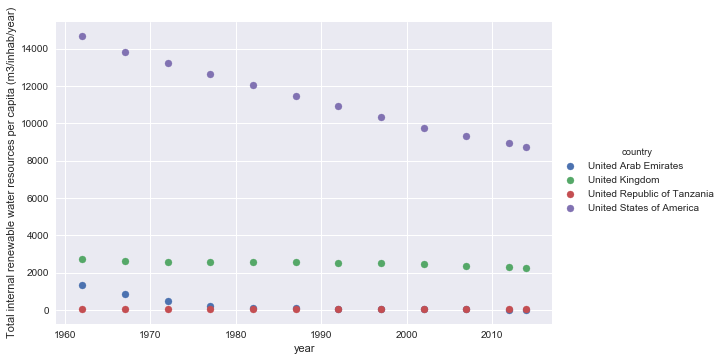

In [174]:
#plot Total internal renewable water resources per capita (m3/inhab/year) over time by country
import seaborn

fg = seaborn.FacetGrid(data=df, hue= 'country', size= 5, aspect=1.61)
fg.map(pyplot.scatter, 'year', 'Total internal renewable water resources per capita (m3/inhab/year)').add_legend()

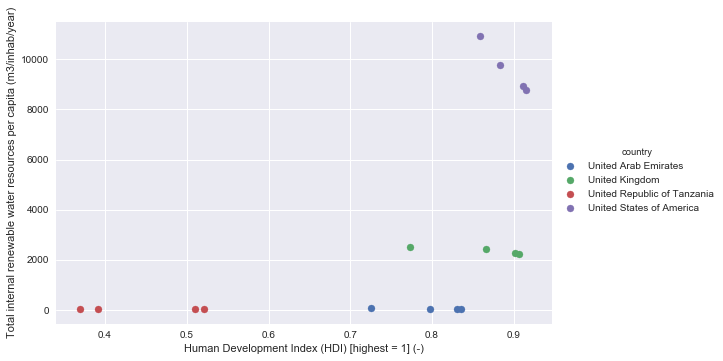

In [173]:
#plot HDI by renewable water resources


fg = seaborn.FacetGrid(data=df, hue= 'country', size= 5, aspect=1.61)
fg.map(pyplot.scatter, 'Human Development Index (HDI) [highest = 1] (-)', 'Total internal renewable water resources per capita (m3/inhab/year)').add_legend()

#thinking about adding a line that denotes, postive relationship?
#plt.plot([0, 4], [1.5, 0], linewidth=2)



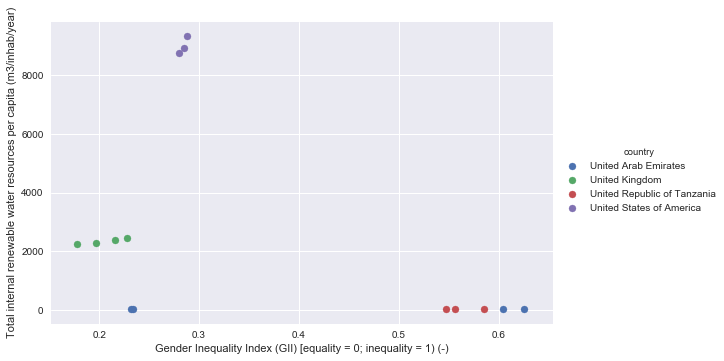

In [175]:
fg = seaborn.FacetGrid(data=df, hue= 'country', size= 5, aspect=1.61)
fg.map(pyplot.scatter, 'Gender Inequality Index (GII) [equality = 0; inequality = 1) (-)', 'Total internal renewable water resources per capita (m3/inhab/year)').add_legend()


In [6]:
#United Kingdom HDI, GII, and inflow committed to treaties


for lab, row in df[df['country'].str.contains("United Kingdom") == True].iterrows():
        a= row['year_range']
        x=(row['Human Development Index (HDI) [highest = 1] (-)'])
        y=(row['Gender Inequality Index (GII) [equality = 0; inequality = 1) (-)'])
        z=(row['Surface water: inflow not submitted to treaties (10^9 m3/year)'])
        b= row['Total internal renewable water resources per capita (m3/inhab/year)']
        print(a,x,y,z, b)
  


1958-1962 nan nan 2 2728.0
1963-1967 nan nan 2 2641.0
1968-1972 nan nan 2 2593.0
1973-1977 nan nan 2 2579.0
1978-1982 nan nan 2 2578.0
1983-1987 nan nan 2 2560.0
1988-1992 0.7732 nan 2 2525.0
1993-1997 nan nan 2 2489.0
1998-2002 0.8654 0.228 2 2445.0
2003-2007 nan 0.21600000000000003 2 2371.0
2008-2012 0.9014 0.19699999999999998 2 2281.0
2013-2017 0.9067 0.1774 2 2241.0


In [7]:
# United States

for lab, row in df[df['country'].str.contains("United States") == True].iterrows():
        a= row['year_range']
        x=(row['Human Development Index (HDI) [highest = 1] (-)'])
        y=(row['Gender Inequality Index (GII) [equality = 0; inequality = 1) (-)'])
        z=(row['Surface water: inflow not submitted to treaties (10^9 m3/year)'])
        b= row['Total internal renewable water resources per capita (m3/inhab/year)']
        print(a,x,y,z, b)

1958-1962 nan nan 251 14688.0
1963-1967 nan nan 251 13833.0
1968-1972 nan nan 251 13216.0
1973-1977 nan nan 251 12632.0
1978-1982 nan nan 251 12045.0
1983-1987 nan nan 251 11482.0
1988-1992 0.8590000000000001 nan 251 10926.0
1993-1997 nan nan 251 10327.0
1998-2002 0.8832 nan 251 9769.0
2003-2007 nan 0.28800000000000003 251 9342.0
2008-2012 0.9115 0.285 251 8952.0
2013-2017 0.915 0.28 251 8758.0


In [8]:
# United Arab Emerites

for lab, row in df[df['country'].str.contains("United Arab") == True].iterrows():
        a= row['year_range']
        x=(row['Human Development Index (HDI) [highest = 1] (-)'])
        y=(row['Gender Inequality Index (GII) [equality = 0; inequality = 1) (-)'])
        z=(row['Surface water: inflow not submitted to treaties (10^9 m3/year)'])
        b= row['Total internal renewable water resources per capita (m3/inhab/year)']
        print(a,x,y,z, b)

1958-1962 nan nan 0 1337.0
1963-1967 nan nan 0 873.1
1968-1972 nan nan 0 462.8
1973-1977 nan nan 0 207.5
1978-1982 nan nan 0 129.5
1983-1987 nan nan 0 98.75
1988-1992 0.7256 nan 0 74.29
1993-1997 nan nan 0 57.8
1998-2002 0.7971 0.625 0 44.2
2003-2007 nan 0.604 0 24.96
2008-2012 0.8305 0.23399999999999999 0 16.75
2013-2017 0.8355 0.2322 0 16.38


In [9]:
#United Republic of Tanzania 

for lab, row in df[df['country'].str.contains("United Republic") == True].iterrows():
        a= row['year_range']
        x=(row['Human Development Index (HDI) [highest = 1] (-)'])
        y=(row['Gender Inequality Index (GII) [equality = 0; inequality = 1) (-)'])
        z=(row['Surface water: inflow not submitted to treaties (10^9 m3/year)'])
        b= row['Total internal renewable water resources per capita (m3/inhab/year)']
        print(a,x,y,z, b)

1958-1962 nan nan 7862 26.0
1963-1967 nan nan 6771 26.0
1968-1972 nan nan 5791 26.0
1973-1977 nan nan 4936 26.0
1978-1982 nan nan 4222 26.0
1983-1987 nan nan 3620 26.0
1988-1992 0.3694 nan 3088 26.0
1993-1997 nan nan 2664 26.0
1998-2002 0.392 nan 2343 26.0
2003-2007 nan 0.585 2023 26.0
2008-2012 0.5104 0.556 1727 26.0
2013-2017 0.5212 0.5469 1571 26.0


In [71]:
df1.sort_values(by= 'Permanent crops area (1000 ha)')

,index,country,year_range,Total area of the country (1000 ha),Arable land area (1000 ha),Permanent crops area (1000 ha),Cultivated area (arable land + permanent crops) (1000 ha),% of total country area cultivated (%),Total population (1000 inhab),Rural population (1000 inhab),...,Harvested irrigated temporary crop area: Other crops (1000 ha),Harvested irrigated permanent crop area: Bananas (1000 ha),Harvested irrigated permanent crop area: Citrus (1000 ha),Harvested irrigated permanent crop area: Grass and Fodder (1000 ha),Harvested irrigated permanent crop area: Other crops (1000 ha),% of total grain production irrigated (%),Flood occurrence (WRI) (-),Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%)
0,1,United Arab Emirates,1958-1962,8360,5.0,3.0,8.0,0.0957,112.2,30.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,United Arab Emirates,1963-1967,8360,6.0,4.0,10.0,0.1196,171.8,39.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,United Arab Emirates,1968-1972,8360,7.0,5.0,12.0,0.1435,324.1,66.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,United Arab Emirates,1973-1977,8360,12.0,5.0,17.0,0.2033,722.8,143.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,United Arab Emirates,1978-1982,8360,18.0,9.0,27.0,0.3230,1158.0,228.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,United Arab Emirates,1983-1987,8360,29.0,9.0,38.0,0.4545,1519.0,315.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,United Arab Emirates,1988-1992,8360,38.0,31.0,69.0,0.8254,2019.0,434.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.7,100.0,99.6
10,11,United Arab Emirates,2008-2012,8360,37.1,39.6,76.7,0.9175,8953.0,1157.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.6,100.0,99.6
11,12,United Arab Emirates,2013-2017,8360,37.5,39.8,77.3,0.9246,9157.0,965.00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.2,99.6,100.0,99.6
23,24,United Kingdom,2013-2017,24361,6234.0,44.8,6279.0,25.7700,64716.0,11986.00,...,3.4000,100.0000,100.0000,100.000,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df=df.rename(columns = {'Human Development Index (HDI) [highest = 1] (-)':'hdi'})
df=df.rename(columns = {'Gender Inequality Index (GII) [equality = 0; inequality = 1) (-)':'gii'})
df=df.rename(columns = {'% of total country area cultivated (%)': 'perc_cult'})
df=df.rename(columns = {'Total internal renewable water resources per capita (m3/inhab/year)': 'renewbycap'})
df=df.rename(columns = {'Agriculture, value added to GDP (%)': 'ag_gdp'})
df=df.rename(columns = {'Surface water produced internally (10^9 m3/year)': 'int_surf'})
df=df.rename(columns = {'Groundwater produced internally (10^9 m3/year)': 'int_ground'})
df=df.rename(columns = {'Total water withdrawal per capita (m3/inhab/year)': 'water_withdrawn_percap'})
df=df.rename(columns = {'Agricultural water withdrawal as % of total water withdrawal (%)': 'ag_withdrawn_perc'})
df=df.rename(columns = {'Industrial water withdrawal as % of total water withdrawal (%)': 'ind_withdrawn_perc'})
df=df.rename(columns = {'Municipal water withdrawal as % of total withdrawal (%)': 'mun_withdrawn_perc'})
df=df.rename(columns = {'Dam capacity per capita (m3/inhab)': 'damvol_percap'})
df=df.rename(columns = {'Freshwater withdrawal as % of total renewable water resources (%)': 'withdrawn_renew_perc'})
df=df.rename(columns = {'Total population with access to safe drinking-water (JMP) (%)': 'access_safewater_perc'})
df=df.rename(columns = {'Surface water: inflow not submitted to treaties (10^9 m3/year)': 'surface_in_notreaty'})
df=df.rename(columns = {'Surface water: inflow secured through treaties (10^9 m3/year)': 'surface_in_treaty'})
df=df.rename(columns = {'Surface water: outflow to other countries submitted to treaties (10^9 m3/year)': 'surf_out_treaty'})
df=df.rename(columns = {'Surface water: outflow to other countries not submitted to treaties (10^9 m3/year)': 'surf_out_notreaty'})


In [91]:
#df.groupby('country').plot(x='year', y='hdi', kind='scatter')


In [77]:
sm= df[['country','year','hdi','gii','perc_cult', 
           'renewbycap','ag_gdp', 'int_surf', 'int_ground', 'water_withdrawn_percap',
           'ag_withdrawn_perc','ind_withdrawn_perc','mun_withdrawn_perc', 'damvol_percap',
           'withdrawn_renew_perc', 'access_safewater_perc', 'surface_in_notreaty',
           'surface_in_treaty', 'surf_out_treaty', 'surf_out_notreaty']]

In [259]:
sm.set_index(['country']).sort_index()

,year,hdi,gii,%cult,renewbycap,ag_gdp,int_surf,int_ground,water_withdrawn_percap,ag_withdrawn_perc,ind_withdrawn_perc,mun_withdrawn_perc,damvol_percap,withdrawn_renew_perc,access_safewater_perc,surface_in_notreaty,surface_in_treaty,surf_out_treaty,surf_out_notreaty
country,,,,,,,,,,,,,,,,,,,
United Arab Emirates,1962,NaN,NaN,0.0957,1337.00,NaN,0.15,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0.00,0.00
United Arab Emirates,1967,NaN,NaN,0.1196,873.10,NaN,0.15,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0.00,0.00
United Arab Emirates,1972,NaN,NaN,0.1435,462.80,NaN,0.15,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0.00,0.00
United Arab Emirates,1977,NaN,NaN,0.2033,207.50,0.4852,0.15,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0.00,0.00
United Arab Emirates,1982,NaN,NaN,0.3230,129.50,0.6404,0.15,0.12,777.2000,80.0000,9.0000,11.000,NaN,600.000,NaN,0,0.00,0.00,0.00
United Arab Emirates,1987,NaN,NaN,0.4545,98.75,1.1430,0.15,0.12,NaN,NaN,NaN,NaN,10.530,NaN,NaN,0,0.00,0.00,0.00
United Arab Emirates,1992,0.7256,NaN,0.8254,74.29,1.3790,0.15,0.12,NaN,NaN,NaN,NaN,7.925,NaN,99.7,0,0.00,0.00,0.00
United Arab Emirates,1997,NaN,NaN,1.1360,57.80,2.0040,0.15,0.12,812.3000,66.7900,9.4880,23.720,15.800,1149.000,99.7,0,0.00,0.00,0.00
United Arab Emirates,2002,0.7971,0.6250,3.1820,44.20,2.2030,0.15,0.12,855.6000,78.4800,3.8330,17.690,14.080,1556.000,99.7,0,0.00,0.00,0.00


In [78]:
sm.groupby('country').describe()

access_safewater_perc     ag_gdp  \
country                                                               
United Arab Emirates        count               6.000000   9.000000   
                            mean               99.650000   1.131589   
                            std                 0.054772   0.619297   
                            min                99.600000   0.485200   
                            25%                99.600000   0.659500   
                            50%                99.650000   0.976700   
                            75%                99.700000   1.379000   
                            max                99.700000   2.203000   
United Kingdom              count               0.000000   6.000000   
                            mean                     NaN   0.912300   
                            std                      NaN   0.325507   
                            min                      NaN   0.649100   
                            25%                      NaN   0.680400   
                            50%                      NaN   0.762400   
                            75%                      NaN   1.097975   
                            max                      NaN   1.437000   
United Republic of Tanzania count               0.000000   6.000000   
                            mean                     NaN  36.618333   
                            std                      NaN   8.500175   
                            min                      NaN  28.780000   
                            25%                      NaN  30.990000   
                            50%                      NaN  32.815000   
                            75%                      NaN  43.392500   
                            max                      NaN  48.000000   
United States of America    count               1.000000   5.000000   
                            mean              173.800000   1.209400   
                            std                      NaN   0.161754   
                            min               173.800000   1.002000   
                            25%               173.800000   1.087000   
                            50%               173.800000   1.241000   
                            75%               173.800000   1.334000   
                            max               173.800000   1.383000   

                                   ag_withdrawn_perc  damvol_percap       gii  \
country                                                                         
United Arab Emirates        count           4.000000       7.000000  4.000000   
                            mean           77.027500      10.286000  0.423800   
                            std             7.060148       3.546958  0.220369   
                            min            66.790000       6.672000  0.232200   
                            25%            75.557500       7.375000  0.233550   
                            50%            79.240000      10.170000  0.419000   
                            75%            80.710000      12.305000  0.609250   
                            max            82.840000      15.800000  0.625000   
United Kingdom              count           3.000000      12.000000  4.000000   
                            mean            0.066100       4.900250  0.204600   
                            std             0.021765       0.537467  0.022174   
                            min             0.049000       3.561000  0.177400   
                            25%             0.053850       4.696250  0.192100   
                            50%             0.058700       5.207000  0.206500   
                            75%             0.074650       5.272000  0.219000   
                            max             0.090600       5.272000  0.228000   
United Republic of Tanzania count           1.000000      12.000000  3.000000   
                            mean            4.425000     102.958333  0.562633   


In [190]:
sm.groupby([sm.country, sm.hdi.round(1)]).size()

country                      hdi
United Arab Emirates         0.7    1
                             0.8    3
United Kingdom               0.8    1
                             0.9    3
United Republic of Tanzania  0.4    2
                             0.5    2
United States of America     0.9    4
dtype: int64

In [191]:
sm.groupby([sm.country]).hdi.max()


country
United Arab Emirates           0.8355
United Kingdom                 0.9067
United Republic of Tanzania    0.5212
United States of America       0.9150
Name: hdi, dtype: float64

In [194]:
sm.groupby([sm.country]).water_withdrawn_percap.max()


country
United Arab Emirates           855.6000
United Kingdom                  45.4800
United Republic of Tanzania      0.4823
United States of America        54.3400
Name: water_withdrawn_percap, dtype: float64

In [201]:
sm.groupby([sm.country]).water_withdrawn_percap.min()

country
United Arab Emirates           665.2000
United Kingdom                  14.0100
United Republic of Tanzania      0.4823
United States of America        51.1500
Name: water_withdrawn_percap, dtype: float64

In [235]:

b= sm.groupby([sm.country, sm.year]).damvol_percap.max()

b.unstack(0)

country,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America
year,,,,
1962,NaN,3.561,100.0,413.0
1967,NaN,4.320,100.0,529.8
1972,NaN,4.520,100.9,622.8
1977,NaN,4.755,101.0,675.5
1982,NaN,4.873,104.2,707.0
1987,10.530,5.178,104.2,718.5
1992,7.925,5.236,104.2,730.2
1997,15.800,5.272,104.2,734.4
2002,14.080,5.272,104.2,735.8


country
United Arab Emirates           Axes(0.125,0.125;0.775x0.755)
United Kingdom                 Axes(0.125,0.125;0.775x0.755)
United Republic of Tanzania    Axes(0.125,0.125;0.775x0.755)
United States of America       Axes(0.125,0.125;0.775x0.755)
dtype: object

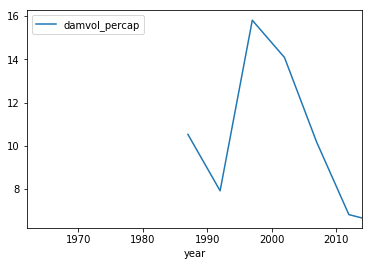

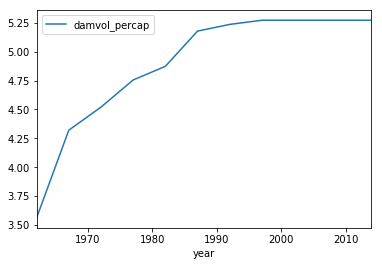

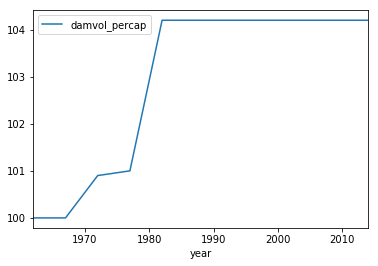

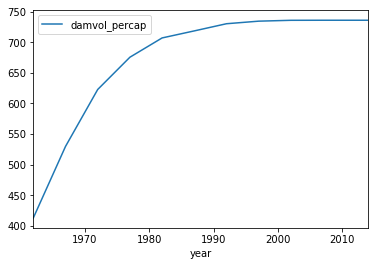

In [215]:
sm.groupby('country').plot(x='year', y='damvol_percap')

In [219]:
sm.groupby('country').surface_in_treaty.min()

country
United Arab Emirates            0.00
United Kingdom                  0.00
United Republic of Tanzania    12.27
United States of America        0.00
Name: surface_in_treaty, dtype: float64

In [234]:
b=sm.groupby(['country','year']).surface_in_treaty.max()
b.unstack(0)

country,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America
year,,,,
1962,0.0,0.0,12.27,0.0
1967,0.0,0.0,12.27,0.0
1972,0.0,0.0,12.27,0.0
1977,0.0,0.0,12.27,0.0
1982,0.0,0.0,12.27,0.0
1987,0.0,0.0,12.27,0.0
1992,0.0,0.0,12.27,0.0
1997,0.0,0.0,12.27,0.0
2002,0.0,0.0,12.27,0.0


In [221]:
sm.groupby('country').surface_in_notreaty.min()

country
United Arab Emirates              0
United Kingdom                    2
United Republic of Tanzania    1571
United States of America        251
Name: surface_in_notreaty, dtype: int64

In [222]:
sm.groupby('country').surface_in_notreaty.max()

country
United Arab Emirates              0
United Kingdom                    2
United Republic of Tanzania    7862
United States of America        251
Name: surface_in_notreaty, dtype: int64

In [4]:
sm.head()
b= sm.groupby(['country', 'year']).access_safewater_perc.min()
b.unstack(0).fillna("")

NameError: name 'sm' is not defined

In [295]:
sm.head()

b =sm.groupby(['country', 'year']).ag_withdrawn_perc.min()
b= b.unstack(0).fillna("")


country,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America
year,,,,
1962,,,,
1967,,,,
1972,,,,
1977,,,,
1982,80,,,
1987,,,,
1992,,,,188.5
1997,66.79,,,
2002,78.48,0.0906,4.425,189.1
